## OpenFDA Durg Event Endpoint Analysis

Author: Sanketh Nagarajan <br>
API: https://open.fda.gov/apis/drug/event/ <br> <br>


### Exploration 1: 
Are different adverse events reported in different countries?

### Approach:
For each country we will get the counts of different adverse events reported since Jan 1st 2004 to Dec 31st 2019. By converting these raw counts to a country-wise distribution we will visualize if there is a difference in the distribution of adverse events reported from different countries.


In [8]:
# Importing required libraries
import os
import sys
sys.path.insert(0, os.path.abspath('./Az_case_study')) # Set current working directory path here

import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from utils.query_utils import get_list_ordered_by_counts, get_count_matrix
from utils.distances import compute_distance_matrix
from utils.data_prep import prepare_data_for_matrix_viz

##### Step 1: Finding the list of unique medical reactions (top 100 reactions)

In [9]:
adv_event_list, _ = get_list_ordered_by_counts(count_field='patient.reaction.reactionmeddrapt.exact', limit=100)
print('Top 5 Adverse Event List = ', adv_event_list[:5])

Top 5 Adverse Event List =  ['DRUG INEFFECTIVE', 'NAUSEA', 'DEATH', 'FATIGUE', 'HEADACHE']


We see that most reported events are related to the drug being ineffective.

##### Step 2: For each reaction in this list (from step 1) find the unique count of occurrence countries

In [10]:
count_matrix_events_countries = get_count_matrix(row_field='patient.reaction.reactionmeddrapt.exact',
                                                 column_field='occurcountry.exact',
                                                 row_limit=100, column_limit=1000, fill_na=0)

In [11]:
# Display count table from step 2 
count_matrix_events_countries

,AD,AE,AF,AG,AI,AL,AM,AN,AO,AR,...,VI,VN,VU,WF,WS,YE,YT,ZA,ZM,ZW
DRUG INEFFECTIVE,0.0,57.0,4.0,0.0,0.0,7.0,6.0,0.0,0.0,700,...,0.0,48.0,0.0,0.0,0.0,0.0,0.0,376,10.0,3.0
NAUSEA,0.0,42.0,3.0,0.0,0.0,2.0,16.0,0.0,0.0,171,...,1.0,30.0,0.0,0.0,1.0,0.0,0.0,268,0.0,1.0
DEATH,0.0,63.0,12.0,0.0,1.0,14.0,33.0,0.0,1.0,2584,...,2.0,177.0,0.0,0.0,1.0,1.0,0.0,2319,20.0,32.0
FATIGUE,0.0,42.0,3.0,0.0,0.0,2.0,2.0,0.0,1.0,425,...,3.0,108.0,0.0,0.0,0.0,1.0,0.0,227,0.0,0.0
HEADACHE,1.0,33.0,4.0,0.0,0.0,4.0,2.0,0.0,2.0,354,...,2.0,31.0,1.0,0.0,1.0,0.0,0.0,245,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VISUAL IMPAIRMENT,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301,...,0.0,4.0,0.0,0.0,1.0,0.0,0.0,70,0.0,0.0
ABDOMINAL DISTENSION,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,44,0.0,0.0
SUICIDAL IDEATION,0.0,3.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,0.0,0.0
CONVULSION,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,57,1.0,0.0


Each row in the above table represents an adverse event and each column represents a country (2 letter country code). It might be difficult to glean insights from this table. Raw counts are not suitable for comparing event ditributions across countries. First we would need to normalize the data per country to know if there is a difference in adverse event distribution between countries.

##### Step 3: Normalizing the raw counts by the number of events reported from the respective countries

In [12]:
norm_matrix_df = prepare_data_for_matrix_viz(count_matrix_events_countries, normalize=True,
                                             transpose_data=True, norm_axis=0)

In [13]:
# Display normalized matrix
norm_matrix_df

,DEATH,DRUG INEFFECTIVE,PYREXIA,ASTHENIA,DYSPNOEA,VOMITING,HEADACHE,DIARRHOEA,NAUSEA,ANAEMIA,...,MEMORY IMPAIRMENT,NASOPHARYNGITIS,CARDIAC FAILURE CONGESTIVE,PSORIASIS,WRONG TECHNIQUE IN PRODUCT USAGE PROCESS,PRODUCT QUALITY ISSUE,FLUSHING,INJECTION SITE PAIN,NO ADVERSE EVENT,INJECTION SITE ERYTHEMA
PH,0.186556,0.014678,0.022336,0.027866,0.044459,0.020208,0.012763,0.009785,0.007871,0.012976,...,0.000638,0.001702,0.005318,0.001276,0.004680,0.001276,0.001064,0.000851,0.000425,0.000213
NZ,0.070371,0.033676,0.019027,0.006947,0.030806,0.019481,0.018725,0.016158,0.025672,0.008759,...,0.004530,0.002416,0.002416,0.003926,0.003020,0.002869,0.005436,0.004077,0.001208,0.001208
NO,0.021153,0.023930,0.029320,0.011761,0.032832,0.016825,0.025809,0.024665,0.029647,0.010944,...,0.009229,0.002205,0.000245,0.003022,0.000898,0.001062,0.002205,0.000653,0.000572,0.000327
CA,0.036803,0.064054,0.014666,0.016783,0.027527,0.018385,0.023755,0.025114,0.030265,0.004737,...,0.003042,0.016785,0.002168,0.005247,0.001135,0.001048,0.003248,0.004868,0.000704,0.001565
NL,0.232412,0.018044,0.024011,0.008624,0.022630,0.014927,0.015494,0.018752,0.022205,0.006729,...,0.005241,0.002497,0.000549,0.000832,0.000974,0.001240,0.001062,0.002621,0.000921,0.001204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MR,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BQ,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
IO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The sum of each row would be 1.0 in the above table (since they represent probability distributions). For each country we have queried just the top 100 adverse events so the probability computations would only be approximate (this choice was made for the sake of memory efficiency and speed).

##### Step 4: Visualizing results using a heat-map

Text(0.5,1,'Scaled probability of event occurrence for each country\n(power scaling of 0.2 used for clarity)')

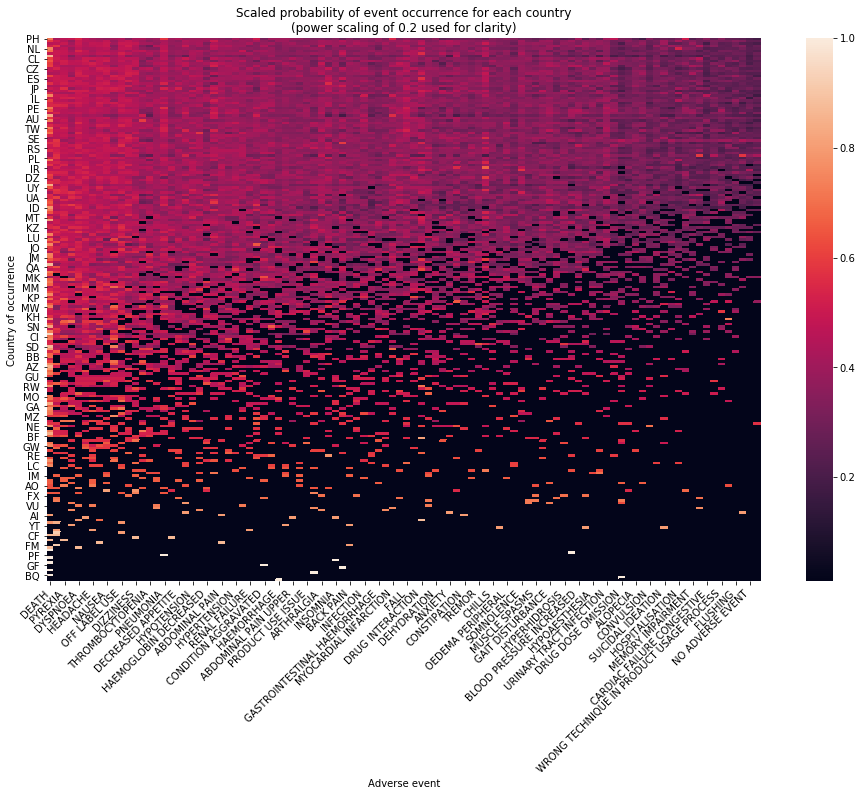

In [38]:
plt.rcParams['figure.figsize'] = [16, 10]  # Fixing figure size (for this and all subsequent plots)
plot = sns.heatmap(np.power(norm_matrix_df, 0.2))
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Adverse event')
plt.ylabel('Country of occurrence')
plt.title('Scaled probability of event occurrence for each country\n(power scaling of 0.2 used for clarity)')

Cases of death are most probably reported in every country but events like 'hospitalization' or 'visual impairment' are not / seldom reported in many countries. This might be because these adverse events are rare by nature or the non-reporting countries lack clear guidance in reporting such events.

Countries like Philippines, China and South Korea report many adverse event types but countries like Laos and Maldives report very few event types. This is most likely because the number of event reports coming from the later countries could be very few compared to other countries (shown in the following graph). Maldives has just 5 event reports filed so far! (from Jan 1st 2004 to Dec 31st 2019)

Text(0.5,1,'Number of reports filed for events that occurred in each country')

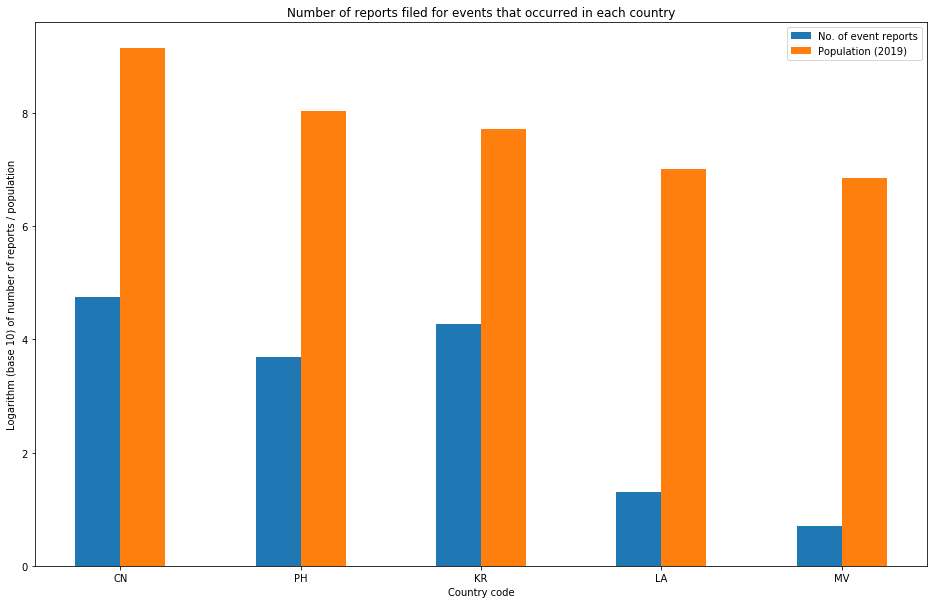

In [39]:
# Country-wise number of event reports plot (paired with population per country as of 2019)
# -----------------------------------------------------------------------------------------

country_list, event_report_count = get_list_ordered_by_counts(count_field='occurcountry.exact', limit=1000)
population_list = [1.4*10**9, 108.12*10**6, 51.23*10**6, 10.16*10**6, 7.17*10**6, 0.39*10**6]  # From Google
countries_of_interest = ['CN', 'PH', 'KR', 'LA', 'MV']

country_count_dict = dict(zip(country_list, event_report_count))
country_population_dict = dict(zip(countries_of_interest, population_list))
bar_width = 0.25

_, ax = plt.subplots()
bar_1 = ax.bar(np.arange(5), np.log10([country_count_dict[key] for key in countries_of_interest]), bar_width)
bar_2 = ax.bar(np.arange(5) + bar_width, np.log10([country_population_dict[key] for key in countries_of_interest]), bar_width)
ax.set_xticks(np.arange(5) + bar_width / 2)
ax.set_xticklabels(countries_of_interest)
ax.legend((bar_1[0], bar_2[0]), ('No. of event reports', 'Population (2019)'))

plt.xlabel('Country code')
plt.ylabel('Logarithm (base 10) of number of reports / population')
plt.title('Number of reports filed for events that occurred in each country')

Although we see a significant difference in adverse event distribution between countries, it would be useful to check if there are similarities between countries. For this we will use **t-SNE** (t-Distributed Stochastic Neighbors Embedding).

##### Step 5: Visualizing clusters in 2D using t-SNE

In [27]:
# Step 5.1: Constructing the distance matrix
# (using KL Divergence as our distance metric since we are comparing probability distributions)

dist_matrix = compute_distance_matrix(norm_matrix_df, metric='kl_divergence')

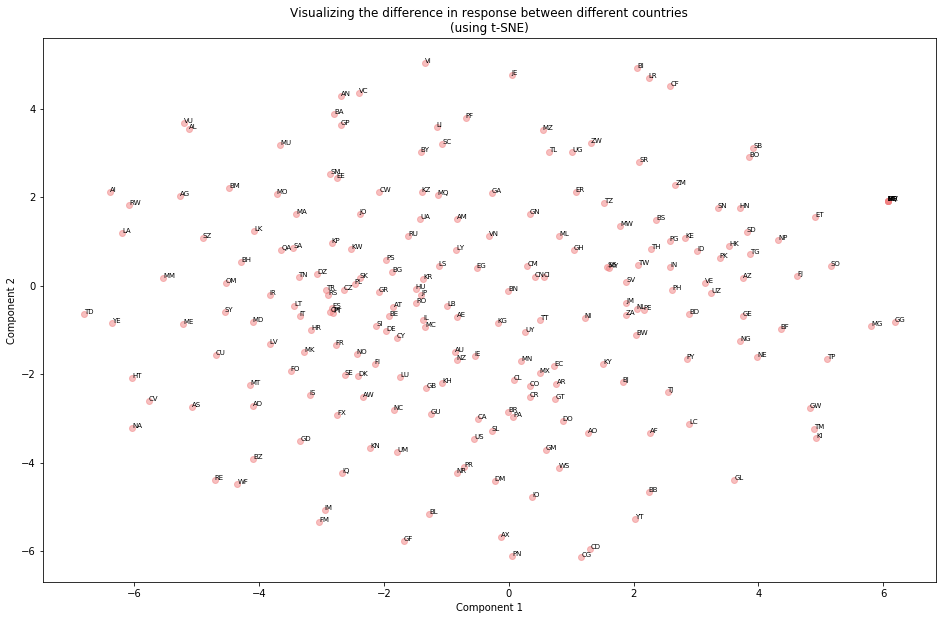

In [40]:
# Step 5.2: Visualize clusters in 2 dimensions
np.random.seed(4)  # Setting random seed for consistency
cluster_data = TSNE(n_components=2, metric='precomputed').fit_transform(dist_matrix)

# Plot cluster data points in 2D
fig, ax = plt.subplots()
ax.scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.5, c='lightcoral')
for idx in range(len(dist_matrix)):
    ax.annotate(norm_matrix_df.index[idx], (cluster_data[idx, 0], cluster_data[idx, 1]), fontsize=7)
plt.title('Visualizing the difference in response between different countries\n(using t-SNE)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Although there is no prominent clustring observed, we do see certain countries having similar event distributions to each other. 


##### Conclusion:

By analyzing the heatmap and t-SNE plots, we can conclude that there is indeed an observable difference in the type of adverse events reported across different countries (these could be due to many factors - geographic, economic, etc.)

##### Note:
This analysis can be extend to each medicine or disease type by making simple adjustments to the search queries